In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("OSBS_datasets/Cleaned_data/cleaned_30min_final_data.csv",parse_dates=["datetime"])

In [5]:
X = df.drop(columns=['datetime'])  # features only
kmeans = KMeans(n_clusters=3, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(X)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, execu

In [8]:
df.tail(10)

,datetime,soilCO2concentrationMean,soilTempMean,VSWCMean,VSICMean,windSpeedMean,windDirMean,RHMean,tempRHMean,dewTempMean,...,VPD,soilTempMean_lag1h,soilTempMean_lag2h,VSWCMean_lag1h,VSWCMean_lag2h,soilCO2concentrationMean_lag1h,soilCO2concentrationMean_lag2h,VPD_lag1h,VPD_lag2h,risk_cluster
8603,2021-06-29 05:30:00+00:00,2521.8775,26.264267,0.070057,886.173367,0.159500,66.285500,94.336667,22.957233,21.950867,...,0.158697,26.667767,27.105067,0.070227,0.070390,2521.8775,2521.8775,0.236596,0.398514,2
8604,2021-06-29 06:00:00+00:00,2521.8775,26.081400,0.070000,886.246767,0.165833,73.954167,94.877667,22.862900,21.950967,...,0.142720,26.460300,26.881933,0.070150,0.070300,2521.8775,2521.8775,0.175340,0.320531,0
8605,2021-06-29 06:30:00+00:00,2521.8775,25.912467,0.069917,886.404900,0.140167,37.259500,95.715000,22.711167,21.944333,...,0.118297,26.264267,26.667767,0.070057,0.070227,2521.8775,2521.8775,0.158697,0.236596,1
8606,2021-06-29 07:00:00+00:00,2521.8775,25.766900,0.069817,886.496533,0.142333,58.227333,95.920667,22.636600,21.905500,...,0.112111,26.081400,26.460300,0.070000,0.070150,2521.8775,2521.8775,0.142720,0.175340,2
8607,2021-06-29 07:30:00+00:00,2521.8775,25.645467,0.069750,886.564733,0.085333,95.536500,93.890667,23.160233,22.073400,...,0.173308,25.912467,26.264267,0.069917,0.070057,2521.8775,2521.8775,0.118297,0.158697,1
8608,2021-06-29 08:00:00+00:00,2521.8775,25.534167,0.069700,886.772500,0.130500,139.771667,92.134000,23.635067,22.234333,...,0.229623,25.766900,26.081400,0.069817,0.070000,2521.8775,2521.8775,0.112111,0.142720,2
8609,2021-06-29 08:30:00+00:00,2521.8775,25.418000,0.069607,886.899867,0.073500,268.586333,93.324000,23.556967,22.368400,...,0.193970,25.645467,25.912467,0.069750,0.069917,2521.8775,2521.8775,0.173308,0.118297,2
8610,2021-06-29 09:00:00+00:00,2521.8775,25.303467,0.069530,886.939567,0.098500,136.980000,93.681000,23.600300,22.473800,...,0.184077,25.534167,25.766900,0.069700,0.069817,2521.8775,2521.8775,0.229623,0.112111,1
8611,2021-06-29 09:30:00+00:00,2521.8775,25.188833,0.069487,887.161433,0.156167,38.990167,96.685950,22.861312,22.255457,...,0.092328,25.418000,25.645467,0.069607,0.069750,2521.8775,2521.8775,0.193970,0.173308,2
8612,2021-06-29 10:00:00+00:00,2521.8775,25.128500,0.069400,887.302000,0.145000,16.355000,96.459917,22.960529,22.283013,...,0.099219,25.303467,25.534167,0.069530,0.069700,2521.8775,2521.8775,0.184077,0.229623,0


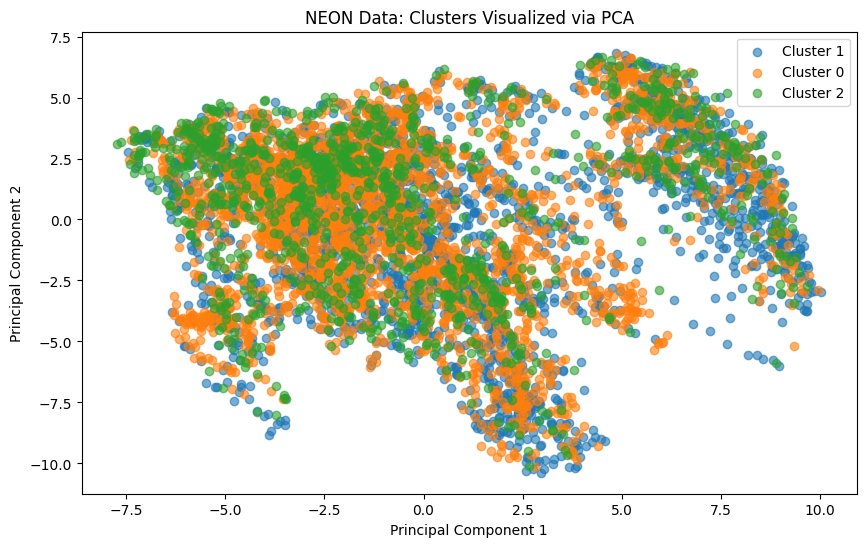

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is loaded as df
features = df.drop(columns=['datetime', 'risk_cluster'])

# 1. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Create a DataFrame with PCA results + cluster
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['risk_cluster'].values

# 4. Plot
plt.figure(figsize=(10,6))
for c in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {c}', alpha=0.6)

plt.title('NEON Data: Clusters Visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [14]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your dataset is loaded as df_30
features = df.drop(columns=['datetime', 'risk_cluster'])

# 1. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3. Create DataFrame with PCA results + cluster
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = df['risk_cluster'].values

# 4. Interactive 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='cluster',          # cluster colors
    opacity=0.7,
    labels={'cluster':'Risk Cluster'},
    title='NEON Data: 3D Clusters via PCA'
)

fig.update_traces(marker=dict(size=4))  # smaller markers if many points
fig.show()


In [15]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Assuming your dataset is loaded as df
features = df.drop(columns=['datetime', 'risk_cluster'])

# 1. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. Reduce to 3D using t-SNE
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 3. Create DataFrame with t-SNE results + cluster
tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2', 'Dim3'])
tsne_df['cluster'] = df['risk_cluster'].values

# 4. Interactive 3D scatter plot
fig = px.scatter_3d(
    tsne_df,
    x='Dim1',
    y='Dim2',
    z='Dim3',
    color='cluster',
    opacity=0.7,
    labels={'cluster':'Risk Cluster'},
    title='NEON Data: 3D Clusters via t-SNE'
)

fig.update_traces(marker=dict(size=4))  # adjust marker size
fig.show()


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [16]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume your dataset is df
features = df.drop(columns=['datetime', 'risk_cluster'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Reduce to 3D with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
pca_df['cluster'] = df['risk_cluster'].values

# Compute cluster centroids
centroids = pca_df.groupby('cluster')[['PC1','PC2','PC3']].mean().reset_index()

# 3D scatter plot
fig = go.Figure()

# Add points
for c in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster']==c]
    fig.add_trace(go.Scatter3d(
        x=subset['PC1'],
        y=subset['PC2'],
        z=subset['PC3'],
        mode='markers',
        marker=dict(size=4),
        name=f'Cluster {c}'
    ))

# Add lines connecting centroids in cluster order
fig.add_trace(go.Scatter3d(
    x=centroids['PC1'],
    y=centroids['PC2'],
    z=centroids['PC3'],
    mode='lines+markers',
    line=dict(color='black', width=4),
    marker=dict(size=6, color='black'),
    name='Centroid Connection'
))

fig.update_layout(
    title='NEON Data 3D Clusters with Centroid Lines',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()


In [17]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Plot points per cluster
for c in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster']==c]
    fig.add_trace(go.Scatter3d(
        x=subset['PC1'],
        y=subset['PC2'],
        z=subset['PC3'],
        mode='markers',
        marker=dict(size=4),
        name=f'Cluster {c}'
    ))

# Draw lines along PC1 extremes
colors = ['red', 'green', 'blue']
for i, c in enumerate(sorted(pca_df['cluster'].unique())):
    subset = pca_df[pca_df['cluster']==c]
    # Line along PC1 from min to max, using mean of PC2, PC3
    line_x = [subset['PC1'].min(), subset['PC1'].max()]
    line_y = [subset['PC2'].mean(), subset['PC2'].mean()]
    line_z = [subset['PC3'].mean(), subset['PC3'].mean()]
    
    fig.add_trace(go.Scatter3d(
        x=line_x,
        y=line_y,
        z=line_z,
        mode='lines',
        line=dict(color=colors[i], width=6),
        name=f'Cluster {c} boundary'
    ))

fig.update_layout(
    title='NEON 3D Clusters with Colored Boundaries',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()


In [18]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Plot points per cluster
for c in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster'] == c]
    fig.add_trace(go.Scatter3d(
        x=subset['PC1'],
        y=subset['PC2'],
        z=subset['PC3'],
        mode='markers',
        marker=dict(size=4),
        name=f'Cluster {c}'
    ))

# Draw transparent planes along PC1 to divide clusters
colors = ['rgba(255,0,0,0.2)', 'rgba(0,255,0,0.2)', 'rgba(0,0,255,0.2)']

for i, c in enumerate(sorted(pca_df['cluster'].unique())):
    subset = pca_df[pca_df['cluster'] == c]
    x_val = np.mean([subset['PC1'].min(), subset['PC1'].max()])  # plane position
    y_range = [subset['PC2'].min(), subset['PC2'].max()]
    z_range = [subset['PC3'].min(), subset['PC3'].max()]

    # Create a plane as a mesh
    fig.add_trace(go.Mesh3d(
        x=[x_val, x_val, x_val, x_val],
        y=[y_range[0], y_range[1], y_range[1], y_range[0]],
        z=[z_range[0], z_range[0], z_range[1], z_range[1]],
        color=colors[i],
        opacity=0.3,
        name=f'Cluster {c} plane',
        showscale=False
    ))

fig.update_layout(
    title='NEON 3D Clusters with Transparent Boundary Planes',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()
